In [13]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleanup Data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [14]:
# Only get Data Analyst jobs from Canada
df_DA_CA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Canada')].copy()

# Drop NaN values from the column for plotting
df_DA_CA = df_DA_CA.dropna(subset=['salary_year_avg'])

df_DA_CA['salary_year_avg'].sample(10)


399340     65000.0
351717     82750.0
202712    100500.0
478961    160000.0
427222     98500.0
536043     98500.0
566144     63000.0
238284    111175.0
59599     120000.0
593022     90000.0
Name: salary_year_avg, dtype: float64

<Axes: >

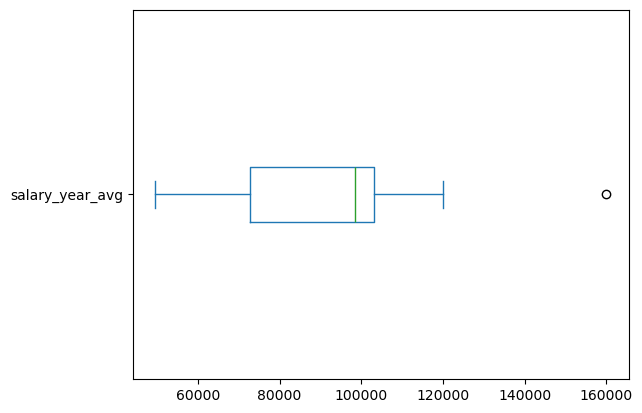

In [15]:
df_DA_CA['salary_year_avg'].plot(kind='box', vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2039a3a6810>,
 'caps': [<matplotlib.lines.Line2D at 0x2039a3a5010>,
 'boxes': [<matplotlib.lines.Line2D at 0x2039a3a7490>],
 'medians': [<matplotlib.lines.Line2D at 0x2039a393c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2039a393150>],
 'means': []}

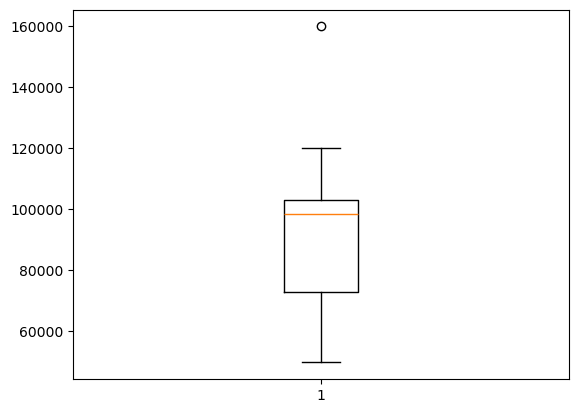

In [16]:
plt.boxplot(df_DA_CA['salary_year_avg'])

C:\Users\User\AppData\Local\Temp\ipykernel_19324\3688393748.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


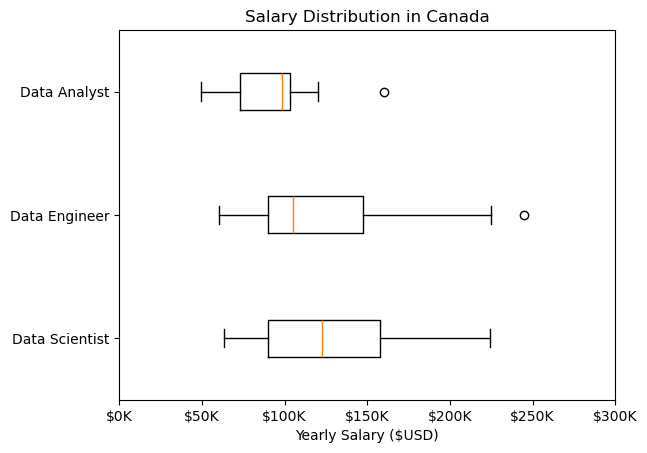

In [31]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

# Only get Data Analyst jobs from Canada
df_CA = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Canada')].copy()

df_CA = df_CA.dropna(subset=['salary_year_avg'])

job_list = [df_CA[df_CA['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in Canada')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 300000)
plt.show()